In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path+"\\code")

from model_plot import roc_plot
from model_plot import pr_plot
from model_plot import conf_mat
from model_plot import acc_print
from model_plot import roc_print
from model_plot import var_imp
from model_plot import train_nn

# Nature of the Analysis

The purpose of our analysis here is to predict vehicle fuel type, electric vehicle or internal combustion engine (EV or ICEV), based on the personal and household attributes of respondents in the 2019 California Vehicle Survey. In particular, we wish to investigate the performance of the traditinal methodology used in the field of Transportation Choice Modeling (TCM), namely Logistic regression, compared to other models typically seen in machine learning (i.e. methods not widely used in TCM).

For the following analysis and results, the following conventions are adopted: a positive case refers to an EV vehicle, and a negative case refers to a ICEV vehicle. The confusion matrices below are constructed such that the rows refer to the actual class, while the columns refer to the predicted class. Thus the $C_{ij}$ entry refers to the number of observations known to be in group $i$ and predicted to be in group $j$.

We explore four different types of model: Logistic Regression (log), Random Forests (rf), K-Nearest Neighbors classifiers (knn), and Neural Networks (nn). After appropriate cleaning and encoding, the data was divided into a training and testing set. For the log, rf, and knn models, model hyperparameters were selected using crossvalidation (gridsearch and random search methods) on the training data set. Finally, the (reported) model performance was evaluated using the holdout testing set. Furthermore, due to the (moderate) imbalanced nature of the data set, we use oversampling to adjust for this problem by balancing the training data. We oversample the training dataset using two algorithms, naive oversampling (over) and SMOTE oversampling (smote), to obtain two new training data sets. We then train each model (again selecting hypeparameters using CV) on the two oversampled training datesets, and investigate the model performance using the holout testing sample. 

While we have a moderate amount of computing power, we do not have enough to rigourously select (using CV) hyperparametes for Neural Networks. As such, we simply investigate the performance for a few potentially fruitful architectures. Again, each architecture is fit using the training data sets (normal, naive oversample, and smote oversample) and then evaluated on the holdout test set. Additionally, our machines were not capable running an SVM model.

Finally, we note that naive oversampling was used because it is one of the simplest solutions to the problem of class imbalance. SMOTE oversampling was added because naive oversampling can increase the chance that overfitting occurs, and the SMOTE algorithm was designed to correct for this.

## Model Performance Measures

There are many ways to measure the perormance of a classification model. While we provide quite a few standard ways of assessing model quality, not all are entirely relevant here. Some may fail to highlight important features of a model, while others could be potentially misleading (especially due to the class imbalance discussed above). As a result, we will not foucus on overall accuracy of models, nor will we focus on ROC plots, for these performance measures can be misleading in the presence of high class imbalance. Similarly, for the models below, while PR curves are generally better measures of perfromance in the presense of class imbalance, they mask the difference in perfromance across different oversampling regimes. We do, however, still provide accuracy, ROC curves, and PR curves for the interested reader, for the contrast between the information conveyed by these metric and those that are important in this situation can still be informative.

For the purposes of this analysis, True Positive Rate (tpr), False Positive Rate (fpr), and astute analysis of confusion matrices provide the best measures of a model's performance. Since our objective is to predict EV types, the minority class, true positive rates provide a much better measure of a model's predictive power compared to overall accuracy, as the latter can be  very high in the presense of class imbalance despite poor model performance predicting the minorty class. Furthermore, we highlight false negative rate because it is most relevant in TCM. If these models are to be used in future market research in TCM, and hence policy formation, overestimating the number of EV drivers is much more costly than underestimating them. The costs of infrastructure supporting increasing EV ownership are high, and while the goverment wishes to encourage EV use, the costs passed onto the tax payer resulting from policy overestimating the number of EV persent in the market could have the opposite effects, among other problems.

Finally, confusion matrices contain nice intuitive summaries of these performance metrics. We therefore highlight the resulting confusion matrices for each model below. See above for how to read the confusion matrices provided below.

### Investigation of Logistic Regression Models

Here we investigate the use of logistic regression models for predicting vehicle type. Each model uses an L2 regularization penalty, the strength of which is tuned using CV. Model accuracy metrics are shown below. The ROC plots for each model appear to be similar; however, as expected, confusion matrices tell a very different story. Without oversampling to adjust for the class imbalaance, our log model achieves a very high overall accuracy (approximately 0.9) simply by classifying most data points as ICEV (the majority class). This less than desireable situation is somewhat remedied by oversampling the training data. Under both oversampling regimes, the model accuracy drops, as expected, but the true positiverate increases from around 0.18 to well over 0.7 (0.74 for naive oversampling and 0.72 for smote). However, this is not without cost, as the false positive rate also increases substantially, a fact highlighted by each of the confustion matrices, and (somewhat) by the differences in fpr accross models. Between oversampling techniques, SMOTE appear to give the best results: reducing the fpr compared to naive oversampling while still maintaining a relatively hight tpr.

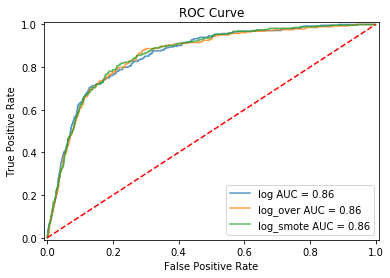

In [2]:
fpr, tpr = np.load('../output_files/fpr_log.npy'),np.load('../output_files/tpr_log.npy')
roc_auc = np.load('../output_files/roc_auc_log.npy')

fpr_over, tpr_over = np.load('../output_files/fpr_log_over.npy'),np.load('../output_files/tpr_log_over.npy')
roc_auc_over = np.load('../output_files/roc_auc_log_over.npy')

fpr_smote, tpr_smote = np.load('../output_files/fpr_log_smote.npy'),np.load('../output_files/tpr_log_smote.npy')
roc_auc_smote = np.load('../output_files/roc_auc_log_smote.npy')

label = ['log','log_over','log_smote']
fpr = [fpr,fpr_over,fpr_smote]
tpr = [tpr,tpr_over,tpr_smote]
roc_auc = [roc_auc,roc_auc_over,roc_auc_smote]
roc_plot(label,fpr,tpr,roc_auc)

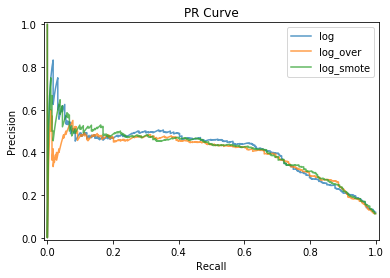

In [3]:
precision, recall = np.load('../output_files/precision_log.npy'),np.load('../output_files/recall_log.npy')
precision_over, recall_over = np.load('../output_files/precision_log_over.npy'),np.load('../output_files/recall_log_over.npy')
precision_smote, recall_smote = np.load('../output_files/precision_log_smote.npy'),np.load('../output_files/recall_log_smote.npy')

label = ['log','log_over','log_smote']
recall = [recall,recall_over,recall_smote]
precision = [precision,precision_over,precision_smote]
pr_plot(label,recall,precision)

In [4]:
# confusion matrix
cm = np.load('../output_files/cm_log.npy')
cm_over = np.load('../output_files/cm_log_over.npy')
cm_smote = np.load('../output_files/cm_log_smote.npy')

label = ['log','log_over','log_smote']
cm = [cm, cm_over, cm_smote]
conf_mat(label, cm)

,ICEV,EV
ICEV,2308,58
EV,231,52


,ICEV,EV
ICEV,1943,423
EV,72,211


,ICEV,EV
ICEV,1987,379
EV,79,204


In [5]:
# Accuracy
acc = np.load('../output_files/acc_log.npy')
acc_over = np.load('../output_files/acc_log_over.npy')
acc_smote = np.load('../output_files/acc_log_smote.npy')

label = ['log','log_over','log_smote']
acc = [acc, acc_over, acc_smote]
acc_print(label,acc)

print('')

# ROC values
y_true = np.load('../output_files/y_test.npy')
y_pred = np.load('../output_files/y_pred_log.npy')
y_pred_over = np.load('../output_files/y_pred_log_over.npy')
y_pred_smote = np.load('../output_files/y_pred_log_smote.npy')

y_pred = [y_pred, y_pred_over, y_pred_smote]
roc_print(label,y_true,y_pred)

Accuracy of  log  is  0.8909
Accuracy of  log_over  is  0.81314
Accuracy of  log_smote  is  0.8271

FPR of  log  is  0.02451
TPR of  log  is  0.18375
PPV of  log  is  0.47273

FPR of  log_over  is  0.17878
TPR of  log_over  is  0.74558
PPV of  log_over  is  0.33281

FPR of  log_smote  is  0.16019
TPR of  log_smote  is  0.72085
PPV of  log_smote  is  0.34991



### Investigation of Random Forest

Here we investigate the use of Random Forests for predicting vehicle type. Each model uses cross validation to select optimal hyperparameter for, among other things, the number of decission trees in each forest model and the maximum depth of each tree. From the model metrics below, we can see that once again, in the absense of oversampling, the rf has a tendancy to classify many observations as ICEV vehicles. Similar to the logistic regression models, the true positive rate is imporoved with oversampling, jumping from around 0.3 without to between approximatly 0.7 and 0.5 without oversampling (0.7 with naive oversampling, and 0.554 with smote). As expected, these gains in tpr are met with increases in fpr. The SMOTE algorithm once again provides moderate increases in tpr while simultaneously attaining a lower fpr than naive oversampling achieves.

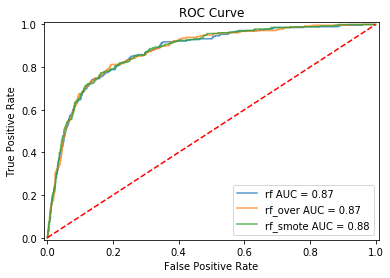

In [6]:
fpr, tpr = np.load('../output_files/fpr_rf.npy'),np.load('../output_files/tpr_rf.npy')
roc_auc = np.load('../output_files/roc_auc_rf.npy')

fpr_over, tpr_over = np.load('../output_files/fpr_rf_over.npy'),np.load('../output_files/tpr_rf_over.npy')
roc_auc_over = np.load('../output_files/roc_auc_rf_over.npy')

fpr_smote, tpr_smote = np.load('../output_files/fpr_rf_smote.npy'),np.load('../output_files/tpr_rf_smote.npy')
roc_auc_smote = np.load('../output_files/roc_auc_rf_smote.npy')

label = ['rf','rf_over','rf_smote']
fpr = [fpr,fpr_over,fpr_smote]
tpr = [tpr,tpr_over,tpr_smote]
roc_auc = [roc_auc,roc_auc_over,roc_auc_smote]
roc_plot(label,fpr,tpr,roc_auc)

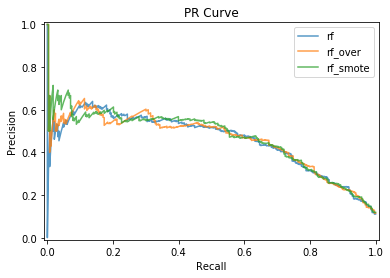

In [7]:
precision, recall = np.load('../output_files/precision_rf.npy'),np.load('../output_files/recall_rf.npy')
precision_over, recall_over = np.load('../output_files/precision_rf_over.npy'),np.load('../output_files/recall_rf_over.npy')
precision_smote, recall_smote = np.load('../output_files/precision_rf_smote.npy'),np.load('../output_files/recall_rf_smote.npy')

label = ['rf','rf_over','rf_smote']
recall = [recall,recall_over,recall_smote]
precision = [precision,precision_over,precision_smote]
pr_plot(label,recall,precision)

In [8]:
# confusion matrix
cm = np.load('../output_files/cm_rf.npy')
cm_over = np.load('../output_files/cm_rf_over.npy')
cm_smote = np.load('../output_files/cm_rf_smote.npy')

label = ['rf','rf_over','rf_smote']
cm = [cm, cm_over, cm_smote]
conf_mat(label, cm)

,ICEV,EV
ICEV,2297,69
EV,197,86


,ICEV,EV
ICEV,2097,269
EV,86,197


,ICEV,EV
ICEV,2198,168
EV,126,157


In [9]:
# Accuracy
acc = np.load('../output_files/acc_rf.npy')
acc_over = np.load('../output_files/acc_rf_over.npy')
acc_smote = np.load('../output_files/acc_rf_smote.npy')

label = ['rf','rf_over','rf_smote']
acc = [acc, acc_over, acc_smote]
acc_print(label,acc)

print('')

# ROC values
y_true = np.load('../output_files/y_test.npy')
y_pred = np.load('../output_files/y_pred_rf.npy')
y_pred_over = np.load('../output_files/y_pred_rf_over.npy')
y_pred_smote = np.load('../output_files/y_pred_rf_smote.npy')

y_pred = [y_pred, y_pred_over, y_pred_smote]
roc_print(label,y_true,y_pred)

Accuracy of  rf  is  0.89958
Accuracy of  rf_over  is  0.86599
Accuracy of  rf_smote  is  0.88901

FPR of  rf  is  0.02916
TPR of  rf  is  0.30389
PPV of  rf  is  0.55484

FPR of  rf_over  is  0.11369
TPR of  rf_over  is  0.69611
PPV of  rf_over  is  0.42275

FPR of  rf_smote  is  0.07101
TPR of  rf_smote  is  0.55477
PPV of  rf_smote  is  0.48308



### Investigation of K-Nearest Neighbor Models

Here we investigate the use of K-Nearest Neighbor models for predicting vehicle type. The number of neighbors are selected via corss validation, as well as the use of distance measure (we select from euclidean, manhattan, and manhalobis distance). Unlike the previous models, the KNN algorithm did not appear to benefit from oversampling of either kind. If anything, oversampling gave worse results. For, while there was a slight increase in tpr  (nothing like the increases seen in the rf or log models above), there was a substantial increase in fpr. This decrease in performance is reflected in both ROC and PR curve plots, and naturally in the confusion matrices for each of the models.

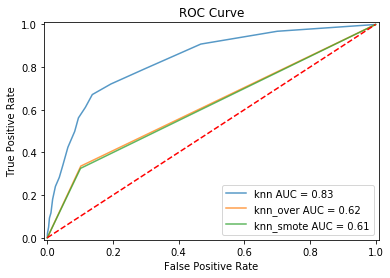

In [10]:
fpr, tpr = np.load('../output_files/fpr_knn.npy'),np.load('../output_files/tpr_knn.npy')
roc_auc = np.load('../output_files/roc_auc_knn.npy')

fpr_over, tpr_over = np.load('../output_files/fpr_knn_over.npy'),np.load('../output_files/tpr_knn_over.npy')
roc_auc_over = np.load('../output_files/roc_auc_knn_over.npy')

fpr_smote, tpr_smote = np.load('../output_files/fpr_knn_smote.npy'),np.load('../output_files/tpr_knn_smote.npy')
roc_auc_smote = np.load('../output_files/roc_auc_knn_smote.npy')

label = ['knn','knn_over','knn_smote']
fpr = [fpr,fpr_over,fpr_smote]
tpr = [tpr,tpr_over,tpr_smote]
roc_auc = [roc_auc,roc_auc_over,roc_auc_smote]
roc_plot(label,fpr,tpr,roc_auc)

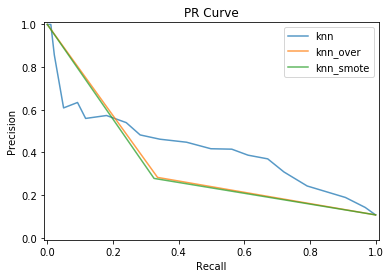

In [11]:
precision, recall = np.load('../output_files/precision_knn.npy'),np.load('../output_files/recall_knn.npy')
precision_over, recall_over = np.load('../output_files/precision_knn_over.npy'),np.load('../output_files/recall_knn_over.npy')
precision_smote, recall_smote = np.load('../output_files/precision_knn_smote.npy'),np.load('../output_files/recall_knn_smote.npy')

label = ['knn','knn_over','knn_smote']
recall = [recall,recall_over,recall_smote]
precision = [precision,precision_over,precision_smote]
pr_plot(label,recall,precision)

In [12]:
# confusion matrix
cm = np.load('../output_files/cm_knn.npy')
cm_over = np.load('../output_files/cm_knn_over.npy')
cm_smote = np.load('../output_files/cm_knn_smote.npy')

label = ['knn','knn_over','knn_smote']
cm = [cm, cm_over, cm_smote]
conf_mat(label, cm)

,ICEV,EV
ICEV,2308,58
EV,215,68


,ICEV,EV
ICEV,2125,241
EV,188,95


,ICEV,EV
ICEV,2127,239
EV,191,92


In [13]:
# Accuracy
acc = np.load('../output_files/acc_knn.npy')
acc_over = np.load('../output_files/acc_knn_over.npy')
acc_smote = np.load('../output_files/acc_knn_smote.npy')

label = ['knn','knn_over','knn_smote']
acc = [acc, acc_over, acc_smote]
acc_print(label,acc)

print('')

# ROC values
y_true = np.load('../output_files/y_test.npy')
y_pred = np.load('../output_files/y_pred_knn.npy')
y_pred_over = np.load('../output_files/y_pred_knn_over.npy')
y_pred_smote = np.load('../output_files/y_pred_knn_smote.npy')

y_pred = [y_pred, y_pred_over, y_pred_smote]
roc_print(label,y_true,y_pred)

Accuracy of  knn  is  0.89694
Accuracy of  knn_over  is  0.83805
Accuracy of  knn_smote  is  0.83767

FPR of  knn  is  0.02451
TPR of  knn  is  0.24028
PPV of  knn  is  0.53968

FPR of  knn_over  is  0.10186
TPR of  knn_over  is  0.33569
PPV of  knn_over  is  0.28274

FPR of  knn_smote  is  0.10101
TPR of  knn_smote  is  0.32509
PPV of  knn_smote  is  0.27795



### Investigation of Neural Network Models

Here we investigate the use of Neural Networks for predicting vehicle type.

We first investigate whether oversampling of the training data is necessary, and which method (if any) should be used to test different model architectures. We fit a simple single hidden layer neural net (with 64 nodes in the hidden layer). We choose this number nodes following the advice of Hastie, Tibshirani and Friedman (Elements of Statistical Learning, ch 11), who suggest that it is better to have more neurons than necessary and use (for example) an early stopping time to avoid overfitting, than to have too few nodes.

In the absense of overasampled data, this simple neural network achieves a modest tpr of approximately 0.4. Oversampling the data doesn't increase this true positive rate (slightly decreasing it in fact), however it does work toward decreasing the false positive rate. Once again, the SMOTE algorithm provides the greatest decrease in fpr while keeping a tpr close to the best neural net fit among the three.

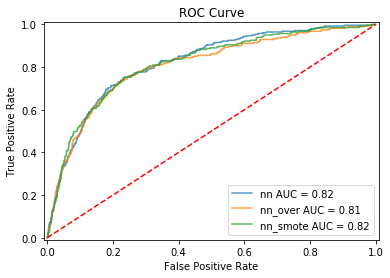

In [14]:
fpr, tpr = np.load('../output_files/fpr_nn.npy'),np.load('../output_files/tpr_nn.npy')
roc_auc = np.load('../output_files/roc_auc_nn.npy')

fpr_over, tpr_over = np.load('../output_files/fpr_nn_over.npy'),np.load('../output_files/tpr_nn_over.npy')
roc_auc_over = np.load('../output_files/roc_auc_nn_over.npy')

fpr_smote, tpr_smote = np.load('../output_files/fpr_nn_smote.npy'),np.load('../output_files/tpr_nn_smote.npy')
roc_auc_smote = np.load('../output_files/roc_auc_nn_smote.npy')

label = ['nn','nn_over','nn_smote']
fpr = [fpr,fpr_over,fpr_smote]
tpr = [tpr,tpr_over,tpr_smote]
roc_auc = [roc_auc,roc_auc_over,roc_auc_smote]
roc_plot(label,fpr,tpr,roc_auc)

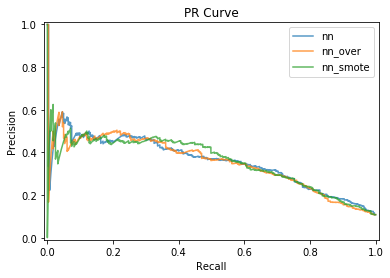

In [15]:
precision, recall = np.load('../output_files/precision_nn.npy'),np.load('../output_files/recall_nn.npy')
precision_over, recall_over = np.load('../output_files/precision_nn_over.npy'),np.load('../output_files/recall_nn_over.npy')
precision_smote, recall_smote = np.load('../output_files/precision_nn_smote.npy'),np.load('../output_files/recall_nn_smote.npy')

label = ['nn','nn_over','nn_smote']
recall = [recall,recall_over,recall_smote]
precision = [precision,precision_over,precision_smote]
pr_plot(label,recall,precision)

In [16]:
# confusion matrix
cm = np.load('../output_files/cm_nn.npy')
cm_over = np.load('../output_files/cm_nn_over.npy')
cm_smote = np.load('../output_files/cm_nn_smote.npy')

label = ['nn','nn_over','nn_smote']
cm = [cm, cm_over, cm_smote]
conf_mat(label, cm)

,ICEV,EV
ICEV,2204,162
EV,170,113


,ICEV,EV
ICEV,2223,143
EV,179,104


,ICEV,EV
ICEV,2240,126
EV,176,107


In [17]:
# Accuracy
acc = np.load('../output_files/acc_nn.npy')
acc_over = np.load('../output_files/acc_nn_over.npy')
acc_smote = np.load('../output_files/acc_nn_smote.npy')

label = ['nn','nn_over','nn_smote']
acc = [acc, acc_over, acc_smote]
acc_print(label,acc)

print('')

# ROC values
y_true = np.load('../output_files/y_test.npy')
y_pred = np.load('../output_files/y_pred_nn.npy')
y_pred_over = np.load('../output_files/y_pred_nn_over.npy')
y_pred_smote = np.load('../output_files/y_pred_nn_smote.npy')

y_pred = [y_pred, y_pred_over, y_pred_smote]
roc_print(label,y_true,y_pred)

Accuracy of  nn  is  0.87467
Accuracy of  nn_over  is  0.87844
Accuracy of  nn_smote  is  0.88599

FPR of  nn  is  0.06847
TPR of  nn  is  0.39929
PPV of  nn  is  0.41091

FPR of  nn_over  is  0.06044
TPR of  nn_over  is  0.36749
PPV of  nn_over  is  0.42105

FPR of  nn_smote  is  0.05325
TPR of  nn_smote  is  0.37809
PPV of  nn_smote  is  0.45923



### Improving the architecture for Neural Networks

To push the performance of our Neural Network (NN) models a bit further, we consider a few different architectures:
* one hidden layer with 64 nodes and ReLU activation function.
* one hidden layer with 64 nodes and sigmoid activation function.
* two hidden layers with 64 nodes and sigmoid activation functions.

Given the performance of the above NN on the SMOTE oversampled data set, we decide to train these architectures on the SMOTE oversampled data, as it provided a relatively high true postive rate, while controlling the rate of false positives. It appears that single layer hidden layer networks perform the best on this type of data. The single hidden layer NN with sigmoid activation attained a higher tpr (.45 compared to .38) with only moderate increases to fpr when compared to the single hidden layer with relu activation (.06 compared with .05; however, the confusion matrix puts this increase in perspective). The dual hidden layer with sigmoid activation performed similar to the single layer relu network in terms of true positive rate (.4 vs .38), but suffered substantial increases to fpr (.07 compared to .05; though the concfusion matrix perhaps provides a clearer picture of the situation).

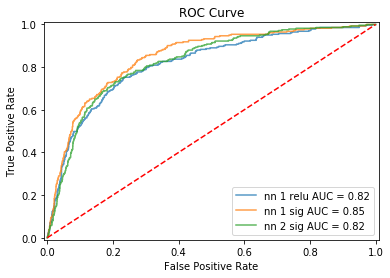

In [18]:
fpr_smote, tpr_smote = np.load('../output_files/fpr_nn_smote.npy'),np.load('../output_files/tpr_nn_smote.npy')
roc_auc_smote = np.load('../output_files/roc_auc_nn_smote.npy')

fpr_smote_2, tpr_smote_2 = np.load('../output_files/fpr_nn_smote_2.npy'),np.load('../output_files/tpr_nn_smote_2.npy')
roc_auc_smote_2 = np.load('../output_files/roc_auc_nn_smote_2.npy')

fpr_smote_3, tpr_smote_3 = np.load('../output_files/fpr_nn_smote_3.npy'),np.load('../output_files/tpr_nn_smote_3.npy')
roc_auc_smote_3 = np.load('../output_files/roc_auc_nn_smote_3.npy')


label = ['nn 1 relu','nn 1 sig','nn 2 sig']
fpr = [fpr_smote,fpr_smote_2,fpr_smote_3]
tpr = [tpr_smote,tpr_smote_2,tpr_smote_3]
roc_auc = [roc_auc_smote,roc_auc_smote_2,roc_auc_smote_3]
roc_plot(label,fpr,tpr,roc_auc)

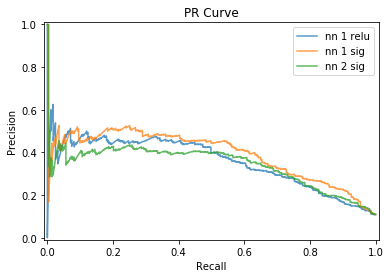

In [19]:
precision_smote, recall_smote = np.load('../output_files/precision_nn_smote.npy'),np.load('../output_files/recall_nn_smote.npy')
precision_smote_2, recall_smote_2 = np.load('../output_files/precision_nn_smote_2.npy'),np.load('../output_files/recall_nn_smote_2.npy')
precision_smote_3, recall_smote_3 = np.load('../output_files/precision_nn_smote_3.npy'),np.load('../output_files/recall_nn_smote_3.npy')

label = ['nn 1 relu','nn 1 sig','nn 2 sig']
recall = [recall_smote,recall_smote_2,recall_smote_3]
precision = [precision_smote,precision_smote_2,precision_smote_3]
pr_plot(label,recall,precision)

In [20]:
# confusion matrix
cm_smote = np.load('../output_files/cm_nn_smote.npy')
cm_smote_2 = np.load('../output_files/cm_nn_smote_2.npy')
cm_smote_3 = np.load('../output_files/cm_nn_smote_3.npy')

label = ['nn 1 relu','nn 1 sig','nn 2 sig']
cm = [cm_smote, cm_smote_2, cm_smote_3]
conf_mat(label, cm)

,ICEV,EV
ICEV,2240,126
EV,176,107


,ICEV,EV
ICEV,2215,151
EV,156,127


,ICEV,EV
ICEV,2191,175
EV,169,114


In [21]:
# Accuracy
acc_smote = np.load('../output_files/acc_nn_smote.npy')
acc_smote_2 = np.load('../output_files/acc_nn_smote_2.npy')
acc_smote_3 = np.load('../output_files/acc_nn_smote_3.npy')

label = ['nn 1 relu','nn 1 sig','nn 2 sig']
acc = [acc_smote, acc_smote_2, acc_smote_3]
acc_print(label,acc)

print('')

# ROC values
y_true = np.load('../output_files/y_test.npy')
y_pred_smote = np.load('../output_files/y_pred_nn_smote.npy')
y_pred_smote_2 = np.load('../output_files/y_pred_nn_smote_2.npy')
y_pred_smote_3 = np.load('../output_files/y_pred_nn_smote_3.npy')

y_pred = [y_pred_smote, y_pred_smote_2, y_pred_smote_3]
roc_print(label,y_true,y_pred)

Accuracy of  nn 1 relu  is  0.88599
Accuracy of  nn 1 sig  is  0.88411
Accuracy of  nn 2 sig  is  0.87014

FPR of  nn 1 relu  is  0.05325
TPR of  nn 1 relu  is  0.37809
PPV of  nn 1 relu  is  0.45923

FPR of  nn 1 sig  is  0.06382
TPR of  nn 1 sig  is  0.44876
PPV of  nn 1 sig  is  0.45683

FPR of  nn 2 sig  is  0.07396
TPR of  nn 2 sig  is  0.40283
PPV of  nn 2 sig  is  0.39446



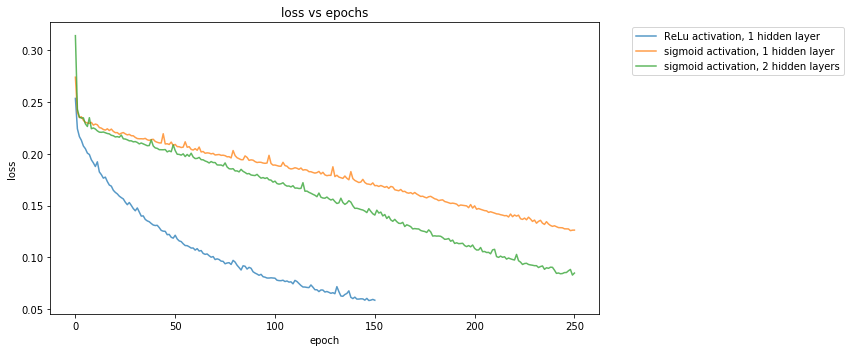

In [22]:
train_loss_results = [np.load('../output_files/train_loss_results_nn_smote.npy'),
                     np.load('../output_files/train_loss_results_nn_smote_2.npy'),
                     np.load('../output_files/train_loss_results_nn_smote_3.npy')]
label = ['ReLu activation, 1 hidden layer', 'sigmoid activation, 1 hidden layer','sigmoid activation, 2 hidden layers']
train_nn(train_loss_results, label, title='loss vs epochs', yaxis='loss')

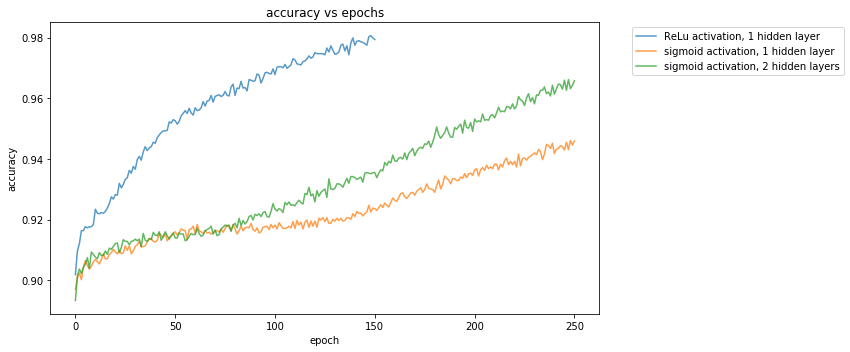

In [23]:
train_loss_results = [np.load('../output_files/train_accuracy_results_nn_smote.npy'),
                     np.load('../output_files/train_accuracy_results_nn_smote_2.npy'),
                     np.load('../output_files/train_accuracy_results_nn_smote_3.npy')]
label = ['ReLu activation, 1 hidden layer', 'sigmoid activation, 1 hidden layer','sigmoid activation, 2 hidden layers']
train_nn(train_loss_results, label, title='accuracy vs epochs', yaxis='accuracy')

## Overall Observations and Conclusions

Overall, with no adjustments made to control for the imbalance in the training data, neural nets provide the highest true positive rate, suffereing from a moderate false postive rate only. With resampling technicues to control for the class imbalance, things become more complicated. While the logistic regression models achieve very high true positive rates, they are plagued by the highest false positive rates among the models considered. Random forests provide a moderate improvement. With resampling they are capable of achieving very simlar tprs while at the same time reducing false postives by a substantial amount. More sophsicicated resamplign techniques appear to allow further reduction of the fpr with only a moderate cost to tpr. 

With no adjusments made to control for the imbalance in the training data, neural networks provide the best overall performance, achieving a moderately high tpr while at the same time managing the tightest control on the fpr. This control on the fpr is also seen when adjustments are made to control for the class imblance. However, no NN we trained was able to achieve tprs as high as random forests (or logistic regression). Though this may be due to the limited investigations of Neural Nets undertaken in this project. Furture research should more throughly explore the potential of neural nets in classification tasks in this field.

With adustments made to controll for the imblanance in the training data, logistic models can achieve relativly high true positive rates compared with the other machine learning methods. However, the high rates of false positives and the dangers associated with overestimating EV presense in the market, limit logisic regression's applicability as the sole model for researchers in TCM. Machine learning methods (like NNs and RFs) provide alternatives that reduces fpr while mantaining moderate to high tpr.

Furthermore, the diversity in model strength and weaknesses seen above provide yet another avenue for future research: Composite modles. By composite models, we understand a model composed of the results from several different classifiers. Weighting and combining the probability estimates for class membership from several classifiers can yield a model combinig aspects of the models combined to make it. For example, using a composite model consisting of the predictions for a logistic model and neural network could yeild a model with higher tpr than a neural net, only slightly less than ordinary logistic regression, but with reduced fpr when compared to logistic regression on its own.